<a href="https://colab.research.google.com/github/vs74/EEG/blob/Baseline/Notebooks/experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
rng = np.random
from array import array
from scipy import stats

#Keras import 
import keras as K
from keras.models import *
from keras.layers import *

from keras import optimizers
from keras.callbacks import *

#import models
#from Linear_Regression import linear_regression 

#import datetime for tensorboard
from datetime import *

#Import for reading the MATLAB files
import glob



Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
tf.__version__


'1.15.0'

In [0]:
#Copy the content from the drive folder to the root directory
!cp /content/drive/My\ Drive/EEG_data/1filtered.mat /content/

In [26]:
#Check the data is downloaded or not
!ls

1filtered.mat  drive  sample_data


In [27]:
#Ensure Google COlab is utilising GPU 
tf.test.gpu_device_name()


'/device:GPU:0'

In [0]:
'''!nvidia-smi
!kill 0
'''

'!nvidia-smi\n!kill 0\n'

In [0]:
#Visualize Using Tenosrboard
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2020-03-20 14:36:54--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.228.157.109, 34.197.77.37, 34.192.123.246, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.228.157.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  53.8MB/s    in 0.2s    

2020-03-20 14:36:54 (53.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [4]:



# data import from matlab
subject_1 = sio.loadmat('1filtered.mat')      #recovering matlab data in the form of a python dictionar
format_1 = subject_1['data']          #in the dictionary, only the data key interests us
print (format_1.shape)

# shuffle trials
(channel, trial, time_points)= format_1.shape

trials = np.arange(trial)
np.random.shuffle(trials)

#Z score
format_1=stats.zscore(format_1, axis=2)

(65, 192, 1000)


In [0]:
format

<function format>

In [0]:
'''
#Plot EEG
#plot of a single channel of EEG
%matplotlib inline
Time = np.linspace(0, 6.25, 1000)
for i in range (channel):
    plt.plot(Time, format_1[i][0])
    plt.figure()

plt.plot(Time, format_1[52][1])

'''

'\n#Plot EEG\n#plot of a single channel of EEG\n%matplotlib inline\nTime = np.linspace(0, 6.25, 1000)\nfor i in range (channel):\n    plt.plot(Time, format_1[i][0])\n    plt.figure()\n\nplt.plot(Time, format_1[52][1])\n\n'

In [12]:
# parametres

eltmp = input ('''Enter the electrode number:''')
electi = list(map(int, eltmp.split()))    #separation of the different responses and recovery in the form of a list of integers
print (type(electi))
print(electi)

window = input ('''Enter the number of stimuli:''')
window = int(window)

n_channel = input('''Enter  the chanel number for which you want your predicion''')
n_channel = list(map(int, n_channel.split()))


relation = input('''Please define what should be predicted (1 for EEG from stimulus or 2 for stimulus from EEG or 3 for EEG forecasting ):''')

if relation == '1':
    response = input("Do you want to embed information of EEG as well ? ( 1 for yes or 2 for no)")
    if response == "2":
      source_Y = electi[0]    #retrieving the electrode number as a whole number - implies that there is only one electrode chosen in this direction
      source_X = [0]          #conversion of the stimuli line in the form of a list - necessary for the for loop: see below - extraction X
    else:
      source_Y = electi[0]
      source_X = [0] + electi[0]

elif relation == '2':
    format_1 = np.flip(format_1,2)     # data inversion according to the time dimension - problem ????
    source_Y = 0
    source_X = electi
    
elif relation == '3':
    response = input("Do you want to embed information of Stimuli as well ? ( 1 for yes or 2 for no)") 
    if response == "2":
      source_Y = n_channel
      source_X = electi
    else: 
      source_Y = n_channel
      source_X = electi + [0]       


Enter the electrode number:1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 
<class 'list'>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
Enter the number of stimuli:160
Enter  the chanel number for which you want your predicion1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 
Please define what should be predicted (1 for EEG from stimulus or 2 for stimulus from EEG or 3 for EEG forecasting ):3
Do you want to embed information of Stimuli as well ? ( 1 for yes or 2 for no)2


In [0]:
elec = int(input("Enter the electrode for which you want prediction "))
for i in range(1, 65):
  if(i!=elec):
    print(i, end = " ")





Enter the electrode for which you want prediction 30
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 

In [11]:
print(len(source_Y))

63


In [0]:
#### separation of train tests / valid / test

train_num = int(np.around(len(trials) * 0.8))
valid_num = int(np.around(len(trials) * 0.1))
test_num = len(trials) - train_num - valid_num


trials_train = trials[0:train_num]
trials_valid = trials[train_num:train_num+valid_num]
trials_test = trials[train_num+valid_num:]


In [0]:
trials_train = np.array([172, 125, 136,  99,  82,  31, 133,  44, 183, 184, 142, 121,  18,
        89, 141,  27, 107,  49,  68, 186,  70,  92, 109,   6, 147, 124,
       117, 161, 137,  39, 157, 159,   4,  23,  25, 145, 179, 118, 163,
       106,  69, 187,  76, 108, 188,  32, 178,  19,  26,  72, 168, 158,
        55,   8, 167,  11,  30,  59,  80,  95,  60, 148, 153,  45,  20,
       152,  73,  48,  36, 100, 185, 131, 138,   3,  13,  97, 126, 171,
       130,  54,   2,  50,  75,  83,  33, 174, 140,  79, 113, 146,  81,
        64,  63,  46, 170,  16, 173, 156,  90, 103, 144,  29,  58,  47,
       105, 189,  56,  34,  12, 165, 122, 119,  94,  42,  24,  37,  14,
        65,  93,  87, 154,  77, 166, 114, 112, 160, 164,  51, 139,  84,
       169,  85, 162,  88,  66, 155,  78,  28,   9,   1,  98, 132, 175,
       177, 115,  96, 111,  52,  21, 180,  61, 191, 143,  10])

trials_valid = np.array([ 67,  15,  38,  22,   0,  74, 182, 151,  91,  43,  53, 123, 127,
       128, 149, 190, 134, 102, 181])

trials_test = np.array([116,  57, 110,   7,  40, 176, 150,  41, 120, 135, 101,  71,  62,
        86, 129,  35, 104,   5,  17])

In [15]:
source_Y

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64]

In [16]:
# extract Y for Muti Channel Prediction
def extract_Y (batch_trials, batch_num):              #creation of a function to recover y - simplification of reading
    y = []
    for i in source_Y:
        y_tmp=format_1[i, batch_trials, window:]     #recovery of Y in the form of a matrix of 154 * 840
        y_tmp=np.reshape(y_tmp, ((time_points-window)*batch_num))    #passage through the list of 129 360 values ​​(test 0, test 1, ... test 153)
        y_tmp=np.matrix(y_tmp)                           #1 * 129360 matrix conversion
        y_tmp=np.transpose(y_tmp)                        #transposition into a matrix of 129360 * 1, matrix equal to that of Matlab (necessary for the rest)
        y.append(y_tmp)
    return(np.hstack(y))                                     #returns the content of y_tmp
y_train = extract_Y (trials_train, train_num)
print ("y_train.shape = ", y_train.shape)
y_valid = extract_Y (trials_valid, valid_num)
print ("y_valid.shape = ", y_valid.shape)
y_test = extract_Y (trials_test, test_num)
print ("y_test.shape = ", y_test.shape)


y_train.shape =  (129360, 64)
y_valid.shape =  (15960, 64)
y_test.shape =  (15960, 64)


In [0]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
    

In [18]:

def extract_X (batch_trials, batch_num):                     #creation of a function to recover x - simplification of reading
  
    x = np.zeros((len(source_X),  batch_num * (time_points - window), window))                                       
    for idx, i in enumerate(source_X):                                      #reading the source list -> reading each electrode number if flip
      x_tmp = []
      for j in batch_trials:
        tmp = rolling_window(format_1[i, j, :-1], window)
        x_tmp.append(tmp)
      x[idx] = np.vstack(x_tmp)

    x = np.hstack(x)
    '''
    x = np.array(np.split(x, len(source_X), axis = -1))
    x = np.moveaxis(x, 0, -1)
    '''
    return x


        
x_train = extract_X (trials_train, train_num)
print ("x_train.shape = ", x_train.shape)
x_valid = extract_X (trials_valid, valid_num)
print ("x_valid.shape = ", x_valid.shape)
x_test = extract_X (trials_test, test_num)
print ("x_test.shape = ", x_test.shape)

x_train.shape =  (129360, 10240)
x_valid.shape =  (15960, 10240)
x_test.shape =  (15960, 10240)


In [19]:
#tensorflow - Linear regression cf github


train_X = x_train
print(train_X.shape)
train_Y = y_train
print(train_Y.shape)
n_samples_train = train_X.shape[0]

valid_X = x_valid
valid_Y = y_valid
n_samples_valid = valid_X.shape[0]

test_X = x_test
test_Y = y_test
n_samples_test = test_X.shape[0]

(129360, 10240)
(129360, 64)


In [20]:
type(train_X.shape)

tuple

In [21]:

#Sanity Check dimension of Input
print("Shape of Train_X  = ", train_X.shape)
print("Shape of Valid_X  = ", valid_X.shape)
print("Shape of Test_X   = ",test_X.shape )





Shape of Train_X  =  (129360, 10240)
Shape of Valid_X  =  (15960, 10240)
Shape of Test_X   =  (15960, 10240)


In [22]:

'''from keras import backend as K

curr_session = tf.get_default_session()
# close current session
if curr_session is not None:
    curr_session.close()
# reset graph
K.clear_session()
# create new session
s = tf.InteractiveSession()
K.set_session(s)
'''

'from keras import backend as K\n\ncurr_session = tf.get_default_session()\n# close current session\nif curr_session is not None:\n    curr_session.close()\n# reset graph\nK.clear_session()\n# create new session\ns = tf.InteractiveSession()\nK.set_session(s)\n'

In [0]:
from keras import backend as K


In [38]:
K.clear_session()

In [0]:
import gc
del model
gc.collect()
#K.clear_session()
tf.compat.v1.reset_default_graph() # TF graph isn't same as Keras graph

In [0]:
#Parameters of model
model_name = "LR"
optimizer_name = "sgd"
training_epochs = 500
batch_size = 1024

layers = 2
learning_rate = 0.1
normalized_data = True
features = train_X.shape[-1]

In [0]:
def linear_regression(X_shape, hidden_layers):
    X = Input((X_shape,))
    inp = X
    for i in range(len(hidden_layers)):
        if (i==(len(hidden_layers)-1)):
            out = Dense(hidden_layers[i], activation = "linear", kernel_initializer = "normal" )(X)
        else: 
            X = Dense(hidden_layers[i], activation = "relu", kernel_initializer = "normal" )(X)
    
    
    model = Model(inputs = inp , output = out)
    sgd = optimizers.SGD(learning_rate)
    adam = optimizers.Adam(lr = learning_rate)
    rmsprop = optimizers.RMSprop(lr = learning_rate)

        
    
    #Compile the model
    model.compile(loss = 'mse', optimizer = sgd, metrics=['mse'])
  
    return model

In [59]:
model = linear_regression(train_X.shape[1], [64])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [60]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10240)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                655424    
Total params: 655,424
Trainable params: 655,424
Non-trainable params: 0
_________________________________________________________________


In [0]:
pip install keras-tuner

In [0]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [0]:
tuner_search=RandomSearch(conv_1D,
                          objective='val_loss',
                          max_trials=2,project_name="dsfhh",
                          executions_per_trial=1,
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
training_epochs = 3

In [0]:
tuner_search.search(train_X, 
    train_Y, 
    batch_size = batch_size,
    epochs = training_epochs, 

    validation_data = (valid_X, valid_Y))

Train on 129360 samples, validate on 15960 samples
Epoch 1/3
129360/129360 [==============================] - 20s 157us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/3
129360/129360 [==============================] - 15s 120us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/3
129360/129360 [==============================] - 16s 121us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan


/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Train on 129360 samples, validate on 15960 samples
Epoch 1/3
129360/129360 [==============================] - 20s 152us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/3
129360/129360 [==============================] - 17s 134us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/3
129360/129360 [==============================] - 17s 133us/sample - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan


/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


INFO:tensorflow:Oracle triggered exit


In [0]:
model=tuner_search.get_best_models(num_models=1)[0]

InvalidArgumentError: ignored

In [0]:
print(model)

In [0]:
tuner_search.results_summary()


In [0]:


class TrainValTensorBoard(TensorBoard):
    def __init__(self, log_dir='./logs', **kwargs):
        # Make the original `TensorBoard` log to a subdirectory 'training'
        training_log_dir = os.path.join(log_dir, 'training')
        super(TrainValTensorBoard, self).__init__(training_log_dir, **kwargs)

        # Log the validation metrics to a separate subdirectory
        self.val_log_dir = os.path.join(log_dir, 'validation')

    def set_model(self, model):
        # Setup writer for validation metrics
        self.val_writer = tf.summary.FileWriter(self.val_log_dir)
        super(TrainValTensorBoard, self).set_model(model)

    def on_epoch_end(self, epoch, logs=None):
        # Pop the validation logs and handle them separately with
        # `self.val_writer`. Also rename the keys so that they can
        # be plotted on the same figure with the training metrics
        logs = logs or {}
        val_logs = {k.replace('val_', ''): v for k, v in logs.items() if k.startswith('val_')}
        for name, value in val_logs.items():
            summary = tf.Summary()
            summary_value = summary.value.add()
            summary_value.simple_value = value.item()
            summary_value.tag = name
            self.val_writer.add_summary(summary, epoch)
        self.val_writer.flush()

        # Pass the remaining logs to `TensorBoard.on_epoch_end`
        logs = {k: v for k, v in logs.items() if not k.startswith('val_')}
        super(TrainValTensorBoard, self).on_epoch_end(epoch, logs)

    def on_train_end(self, logs=None):
        super(TrainValTensorBoard, self).on_train_end(logs)
        self.val_writer.close()

In [0]:


#Set Up Tensorboard for visualisation for training
Name = "{} + optimizer_{} + batch_size_{} + epochs_{} + Layer_{} + learning_rate_{} + + Normalized_{} + relation_{}  + date_".format(model_name, optimizer_name, batch_size, training_epochs, layers, learning_rate,  normalized_data, relation)
logdir ="logs/scalars/"+ Name + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TrainValTensorBoard(log_dir=logdir, write_images = True, histogram_freq = 2 ,write_grads= True)
#Sanity Check for LogDir
print(logdir)

logs/scalars/Conv-1D + optimizer_sgd + batch_size_1024 + epochs_30 + Layer_2 + learning_rate_0.01 + + Normalized_True + relation_3  + date_20200320-145815


In [0]:

LOG_DIR = 'logs/'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
#Get url of TensorBoard to Visualise
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://8788ccb1.ngrok.io


In [0]:
K.clear_session()

In [61]:


#Fit the model with the Data
history = model.fit(
    train_X, 
    train_Y, 
    batch_size = batch_size,
    epochs = training_epochs, 
    validation_data = (valid_X, valid_Y), 
    verbose = 1
    )

''' , checkpoint_callback '''

Train on 129360 samples, validate on 15960 samples
Epoch 1/500
129360/129360 [==============================] - 8s 61us/step - loss: 6.5516 - mean_squared_error: 6.5516 - val_loss: 4.0479 - val_mean_squared_error: 4.0479
Epoch 2/500
129360/129360 [==============================] - 8s 59us/step - loss: 3.1383 - mean_squared_error: 3.1383 - val_loss: 2.7744 - val_mean_squared_error: 2.7744
Epoch 3/500
129360/129360 [==============================] - 8s 60us/step - loss: 2.2904 - mean_squared_error: 2.2904 - val_loss: 2.1738 - val_mean_squared_error: 2.1738
Epoch 4/500
129360/129360 [==============================] - 8s 59us/step - loss: 1.8383 - mean_squared_error: 1.8383 - val_loss: 1.8128 - val_mean_squared_error: 1.8128
Epoch 5/500
129360/129360 [==============================] - 8s 59us/step - loss: 1.5496 - mean_squared_error: 1.5496 - val_loss: 1.5660 - val_mean_squared_error: 1.5660
Epoch 6/500
129360/129360 [==============================] - 8s 59us/step - loss: 1.3475 - mean_squ

' , checkpoint_callback '

In [0]:
!ls -a

.  ..  1filtered.mat  .config  drive  sample_data


In [62]:


#Evaluate model on Test Data -
predictions = model.predict(test_X, verbose = True)



15960/15960 [==============================] - 1s 63us/step


In [63]:
predictions

array([[-2.209944  , -1.4649423 , -0.8654784 , ...,  0.93365616,
         0.70403135,  0.40972492],
       [-1.3932039 , -0.54548347, -0.8328786 , ...,  0.3655109 ,
         0.6672237 ,  0.01271074],
       [-1.2733083 , -0.21069139, -0.06980838, ...,  0.56529117,
         0.621942  ,  0.3222021 ],
       ...,
       [ 0.26892856,  0.16260569, -0.50801325, ...,  0.6624421 ,
         0.592831  ,  0.5409178 ],
       [ 0.15305403,  0.20448679,  0.35964134, ...,  0.3641561 ,
        -0.05693873,  0.08579798],
       [ 1.1968786 ,  1.0835125 ,  0.5572194 , ...,  0.00299196,
        -0.11562873,  0.11294027]], dtype=float32)

In [64]:

y_test

matrix([[-1.37352391, -1.00381515, -0.53908587, ...,  0.54353656,
          0.74701515,  0.25281102],
        [-0.83802018, -0.13943967, -0.44360291, ...,  0.56264081,
          0.4679264 , -0.10779399],
        [-1.17661046, -1.00354661, -0.20456925, ...,  0.59983515,
          0.79661326,  0.10749336],
        ...,
        [ 0.97503819,  0.00976654, -0.46739198, ...,  0.44672292,
          0.33541957,  0.45570985],
        [ 1.81699963,  1.81624439,  0.32709376, ...,  0.28310227,
          0.01816106,  0.22970987],
        [ 0.45641826,  0.17364329,  0.25918084, ...,  0.33475319,
         -0.0774835 ,  0.20166222]])

In [65]:

predictions.shape, y_test.shape



((15960, 64), (15960, 64))

In [0]:

def compute_correlation(true, pred):
    true = true.squeeze()
    pred = pred.squeeze()
    corr_coef = np.corrcoef(true, pred)[0, 1]
    
    return corr_coef 
    
    
    

In [0]:
model.save("LR_3_2_all_channels.h5")

In [0]:
compute_correlation(y_test, predictions)

0.5931331611249704

In [0]:
l = []
for i in range(len(electi)):
  l.append(compute_correlation(y_test[:, i], predictions[:, i]))


In [71]:
source_Y

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64]

In [68]:
l

[0.6772621942647694,
 0.7436438465075206,
 0.705987601939213,
 0.8940107908605207,
 0.8142947668146967,
 0.7533914132617519,
 0.8510966640511993,
 0.8727217160443714,
 0.8685823015311475,
 0.6545666043819512,
 0.9094019822680842,
 0.9124864274020235,
 0.902476439821248,
 0.8619092374872307,
 0.7398731666356742,
 0.7843991667191154,
 0.891492898757521,
 0.9148923197844874,
 0.9222828549587286,
 0.9356167018895122,
 0.5600327952730221,
 0.9300232644938127,
 0.8814130345241605,
 0.8320210445746253,
 0.9046724132326251,
 0.906327352435722,
 0.8911134021049512,
 0.5736733584635088,
 0.8270880925916071,
 0.9402724291110328,
 0.9336145438792876,
 0.9018799425983274,
 0.6897506271095343,
 0.6018512683780847,
 0.6231172797773635,
 0.6359026330538757,
 0.8329775576093773,
 0.8987638406318955,
 0.876354846038458,
 0.8294121871952335,
 0.6554207984697963,
 0.8414426647551958,
 0.8243730427347461,
 0.8581982701782754,
 0.6732431862387525,
 0.9009072495222142,
 0.9164612586453482,
 0.913887217681929

In [0]:
print(l)

[-0.01485182725182106, 0.12109604408301108, 0.19867854025539783, 0.18753107262939583, 0.15252050727524802, 0.04160745769272624, 0.06123395551976592, 0.00717620402628215, 0.0626865728641592, 0.09696522294643181, 0.047233302087743595, 0.09689285817523503, 0.025131428543905984, -0.026840376855266596, 0.016122734410669057, -0.046151557814374425, -0.009631067459226263, 0.027516032836373053, 0.08237045084241412, 0.10047112432996462, -0.018123037811708462, 0.07615820678890813, 0.14044487432711325, 0.07247789264090947, 0.04243959103276471, 0.09490775887749253, 0.0068825050253542835, 0.06201552755410547, -0.06608588733907372, 0.14909806288296096, 0.05975865551212472, 0.10328798917187691, 0.12946932453818477, 0.20016716051017358, 0.09583644543565052, -0.02672044587386154, 0.08341514827131147, 0.046779473551693145, 0.06112239930737398, 0.036710665193143296, -0.044929897819868204, 0.05270904229558889, -0.025247123075140637, 0.0707070345268097, -0.008335951525598479, 0.014986760096424516, 0.0611511

In [0]:
import pandas as pd
a = pd.DataFrame({'R value':a1,
              
               }
             )

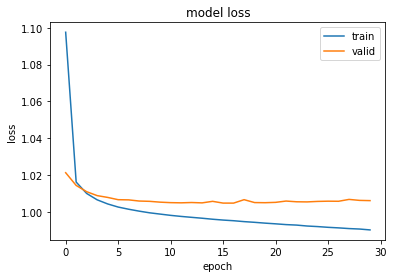

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [0]:
x = x_train[:,:,0]


In [0]:
data = format_1[1, trials_train]

In [0]:
trials_train

array([172, 125, 136,  99,  82,  31, 133,  44, 183, 184, 142, 121,  18,
        89, 141,  27, 107,  49,  68, 186,  70,  92, 109,   6, 147, 124,
       117, 161, 137,  39, 157, 159,   4,  23,  25, 145, 179, 118, 163,
       106,  69, 187,  76, 108, 188,  32, 178,  19,  26,  72, 168, 158,
        55,   8, 167,  11,  30,  59,  80,  95,  60, 148, 153,  45,  20,
       152,  73,  48,  36, 100, 185, 131, 138,   3,  13,  97, 126, 171,
       130,  54,   2,  50,  75,  83,  33, 174, 140,  79, 113, 146,  81,
        64,  63,  46, 170,  16, 173, 156,  90, 103, 144,  29,  58,  47,
       105, 189,  56,  34,  12, 165, 122, 119,  94,  42,  24,  37,  14,
        65,  93,  87, 154,  77, 166, 114, 112, 160, 164,  51, 139,  84,
       169,  85, 162,  88,  66, 155,  78,  28,   9,   1,  98, 132, 175,
       177, 115,  96, 111,  52,  21, 180,  61, 191, 143,  10])

In [0]:
data[1, :160]

array([ 0.33936724,  0.28924169, -0.35187274, -0.71550288, -1.74001374,
       -0.47884704, -2.11326398, -1.79243278,  0.17691985, -0.98618014,
       -1.50788698,  0.2036973 ,  0.55325263, -0.10670112, -0.7357539 ,
       -1.03104191, -1.40876596, -2.48105928, -0.40281364, -0.37575863,
       -1.63227208, -2.93212863, -1.31935213,  1.15118129,  0.6833963 ,
       -0.27737768, -0.90996889, -0.88475467, -1.97529933, -1.73786584,
        0.47622038,  0.30304517,  0.13885149, -0.70514677, -0.0566372 ,
       -3.17193872, -1.32915753,  0.83206004, -0.10633784,  0.4534396 ,
        0.10842336, -0.5566752 , -1.99304757, -1.37532708,  0.834058  ,
        1.21755736,  1.98880432, -0.1664521 ,  0.57825288, -0.17117961,
        0.50734906,  1.25088578,  2.14255749,  0.74809792,  0.53079781,
       -0.80340555, -0.94213721, -0.06736458, -0.4804556 , -1.28017508,
        0.12500746, -0.08439445, -0.15420886,  0.78960544, -0.10439255,
        0.041153  , -0.70461412,  0.06802108,  1.47200198,  1.04

In [0]:
y-

In [0]:
x[839:842]

array([[-1.64999689,  0.17888682,  1.86832763,  0.30250068,  0.27494736,
         0.30113592,  0.25763347,  0.65374396, -0.22232565, -1.35386553,
         0.6868346 ,  0.38499608,  1.01850967,  1.00328054,  0.07539532,
         1.35737712,  0.54020672,  0.58028386, -0.46710333,  1.1468984 ,
         2.63206245,  1.93676113,  1.94380249,  1.30795602,  1.43841633,
         0.95667292,  1.47398072,  1.82258335,  0.28554689,  1.20773205,
         2.26368211,  1.42059799,  1.66602341,  0.88515384,  0.27721575,
         1.08235621, -0.06705278, -0.65530997,  0.46676847, -0.76717485,
        -2.87877969, -0.64525635, -1.32943653,  0.33660413,  0.57759756,
         0.12296704,  0.51956768,  1.18584215,  0.89001647,  1.24568384,
         0.37983643, -0.21917104,  0.35802177,  0.32696089, -0.76821825,
        -2.22574909, -0.56485059, -0.00444439,  0.01904745, -0.22022178,
         0.07149623,  0.70850172,  0.09790316,  0.1702726 ,  0.249543  ,
        -0.99748295,  0.39160462,  0.74267484,  0.0

In [0]:
y_train[:2]

matrix([[0.95539602],
        [1.18836268]])

In [0]:
y_

In [0]:
source_Y

[1]

In [0]:
def plot_predictions(batch_trials, batch_num):
    y_true=format_1[source_Y, batch_trials, window:]     #recovery of Y true values from the dataset
    Time = np.linspace(1, 6.25, (time_points - window))
    

    x_true = format_1[source_X, batch_trials, :]
    y_pred = np.zeros((batch_num, time_points - window))  
    
    for i in range(batch_num):
        k = 0
        while k < time_points - window:
            y_pred[i, k] = model.predict(x_true[i, k : window + k].reshape((1, window, 1)))
            k = k + 1
    print(y_pred.shape)
    
    for i in range(2):
        plt.figure()
        plt.plot(Time, y_true[i], label = "True")
        plt.plot(Time, y_pred[i], label = "Predicted")
        plt.legend()

(19, 840)


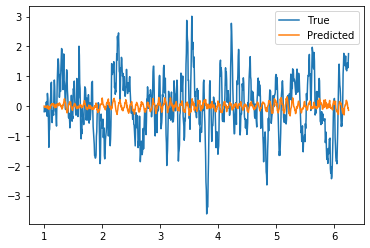

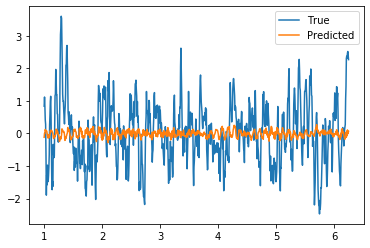

In [0]:
plot_predictions(trials_valid, valid_num)


In [0]:
#Visualise and set the best learning rate for the model 
plt.semilogx(history.history[“lr”], history.history[“loss”])
plt.axis([1e-8, 1e-4, 0, 30])

SyntaxError: ignored

In [0]:
score = model.evaluate(test_X, test_Y)
print("Test Loss:", score[0])


In [0]:
#Graphical Display to plot weights
def plot_weights(weights, electi):
 
        
    T = np.arange(0, 0.00625*window, 0.00625)                       # creation of the time variable (on 1s) for the abscissa
    
    nbr_elct = len(electi)
    (Lo_W, la_W) = weights[0].shape
    Lo_W = int(Lo_W)                                              # number of lines: inputs (160 * nbr_electrodes, for example)
    la_W = int(la_W)                                              # number of columns: number of neurons in the layer
    
    z=0
    while z < nbr_elct:                                           # for each electrode
        z_1=0 
        while z_1 < la_W:                                         # for each neuron of the W layer [1]
            W_tmp = tf.slice(K.constant(weights[0]), [0, z_1], [Lo_W, 1])           # slice: starting value [line 0, column of the neuron], dimensions of the section [160 * nbr_electrodes lines, 1 column])
            W_tmp = tf.slice(W_tmp, [z*window, 0], [window, 1])       # slice: starting value [first value of the new electrode, column 0], dimensions of the section [160 lines, 1 column]
            print (W_tmp.shape)
            
            plt.plot(T, K.eval(W_tmp), label= ("neurone_", z_1, "layer_1, electrode_", electi[z]))
            z_1 = z_1+1
            
        z = z+1
        
    plt.legend()    
    plt.show()
    

In [0]:
weights = np.array(model.get_weights()) #Convert the weights into np array

plot_weights(weights, electi)            #Plot the weights of the model

In [0]:
weights.shape